In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with TEASER-S model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_s import TEASER_S

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_S

# L2_1 = [10 ** p for p in range(2, 8)]
# L2_2 = [10 ** p for p in range(2, 8)]

L2_1 = [500, 1000, 2000, 5000]
L2_2 = [50000, 100000, 200000, 500000]
# RHO = 0
RHO = [100, 500, 1000]
DELTA = 0
MAX_ITER = 10
HYPERPARAMS = {'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_1': [500, 1000, 2000, 5000],
 'l2_2': [50000, 100000, 200000, 500000],
 'rho': [100, 500, 1000],
 'delta': 0,
 'max_iterations': 10}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
# Precomput XTX and decomposition of XTX, since it's needed for all hyperparameters combinations and doesn't change
XTX = (X.T @ X).toarray()
p, U = np.linalg.eigh(XTX)
fit_params = {'XTX': XTX, 'p': p, 'U': U}

In [9]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, S, Xval_in, Xval_out, HYPERPARAMS, fit_params=fit_params)

Training model TEASER_S with hyperparameters {'l2_1': 500, 'l2_2': 50000, 'rho': 100, 'delta': 0, 'max_iterations': 10}
Decompose DTD


norm E 0.061090468460176
diag norm: 0.13716239344731093
diag_diff: 1.3408547650568048

norm E 0.06041944888788634
diag norm: 0.1345955520689868
diag_diff: 1.110803268224394
rho * change E: 1.901309179601418

norm E 0.06009158943394144
diag norm: 0.13368930170296933
diag_diff: 0.925864019831091
rho * change E: 0.07345343929535013

norm E 0.059711862092722535
diag norm: 0.13256477067644742
diag_diff: 0.7728407394172299
rho * change E: 0.04945085905167174

norm E 0.05935521641660702
diag norm: 0.13146527328691424
diag_diff: 0.6462466395038671
rho * change E: 0.045859697324599165

norm E 0.05902043596327302
diag norm: 0.13039656696097152
diag_diff: 0.5416895060356812
rho * change E: 0.04290916245198976

norm E 0.05870431097541826
diag norm: 0.12935558815323636
diag_diff: 0.45553657160580185
rho * change E: 0.04059864186461949

norm E 0.05840412168532859
diag norm: 0.12833943717308852
diag_diff: 0.3847781986561166
rho * change E: 0.03878749718849049

norm E 0.0581176257779746
diag norm: 0.1

norm E 0.047354194282068114
diag norm: 0.09607454796664938
diag_diff: 0.7273934520331494

norm E 0.04679942248478965
diag norm: 0.09498066044820873
diag_diff: 0.6597938830819595
rho * change E: 1.3888120564501076

norm E 0.04669392486937816
diag norm: 0.09465609411272043
diag_diff: 0.6005047045150089
rho * change E: 0.06149241597612007

norm E 0.04652410037306221
diag norm: 0.09413114899838973
diag_diff: 0.5468210237536825
rho * change E: 0.02232945867735504

norm E 0.04635520848780615
diag norm: 0.09360214580404418
diag_diff: 0.49815931575999844
rho * change E: 0.021823597660856987

norm E 0.046190198870849526
diag norm: 0.09307948219373376
diag_diff: 0.4540645243638439
rho * change E: 0.02143038805579251

norm E 0.04602897276142093
diag norm: 0.0925634825014303
diag_diff: 0.4141270996723738
rho * change E: 0.02106959551128831

norm E 0.04587129279364689
diag norm: 0.09205391155604016
diag_diff: 0.3779756189719177
rho * change E: 0.020741382679513587

norm E 0.04571693464704055
diag n

norm E 0.03506777191217331
diag norm: 0.0637091375765867
diag_diff: 0.3809330270887048

norm E 0.03457968550239719
diag norm: 0.06312223432244086
diag_diff: 0.3624731026902092
rho * change E: 1.0047930624275336

norm E 0.03456128212335091
diag norm: 0.06305813501494145
diag_diff: 0.3455821281585635
rho * change E: 0.058775352991262415

norm E 0.03448694541424187
diag norm: 0.0628358919931452
diag_diff: 0.32955251937787106
rho * change E: 0.011240340211945154

norm E 0.03440952436308063
diag norm: 0.06260362134088039
diag_diff: 0.3143100158322536
rho * change E: 0.010495044816538021

norm E 0.034332604037262994
diag norm: 0.062372079810266406
diag_diff: 0.29981570040903893
rho * change E: 0.010426679538236018

norm E 0.03425642141592091
diag norm: 0.06214205312920835
diag_diff: 0.2860344279012957
rho * change E: 0.010360564431017547

norm E 0.03418097841055869
diag norm: 0.06191358410446025
diag_diff: 0.27293287391054544
rho * change E: 0.01029572433917114

norm E 0.034106259515187115
d

norm E 0.021909152085861996
diag norm: 0.03427141376718098
diag_diff: 0.15768395335087157

norm E 0.021522024969867517
diag norm: 0.03389764126233675
diag_diff: 0.15455639078746958
rho * change E: 0.624164770008305

norm E 0.021538898165136884
diag norm: 0.03393906033332663
diag_diff: 0.15163222735513993
rho * change E: 0.054838327355812976

norm E 0.021516980663449765
diag norm: 0.033880669216873056
diag_diff: 0.14877781266883658
rho * change E: 0.0069738528677401905

norm E 0.021491189354348485
diag norm: 0.0338119944052012
diag_diff: 0.14598216654613516
rho * change E: 0.003795183848853085

norm E 0.021465111337257852
diag norm: 0.03374247176640337
diag_diff: 0.1432433299972776
rho * change E: 0.0037178021008153336

norm E 0.021439101168747487
diag norm: 0.03367307209234624
diag_diff: 0.140560131278739
rho * change E: 0.0037058039111784024

norm E 0.021413195688999267
diag norm: 0.033603899905808275
diag_diff: 0.13793149358566328
rho * change E: 0.0036948728117166497

norm E 0.02138

norm E 0.03992374258600151
diag norm: 0.09795065651819865
diag_diff: 1.333965126838429

norm E 0.03977518914656695
diag norm: 0.09715647669971433
diag_diff: 1.1059781426686748
rho * change E: 1.1990105226844858

norm E 0.03959652896674761
diag norm: 0.09666722438616937
diag_diff: 0.9207084796877699
rho * change E: 0.03614429101668541

norm E 0.03939774815796104
diag norm: 0.09606246795978368
diag_diff: 0.7671093478851561
rho * change E: 0.026948540849842915

norm E 0.03921401240438525
diag norm: 0.0954766402187191
diag_diff: 0.6397851014215796
rho * change E: 0.024339660419925368

norm E 0.03904360413070887
diag norm: 0.09491028838034472
diag_diff: 0.5343382867865739
rho * change E: 0.022220669361106945

norm E 0.038884383690275186
diag norm: 0.09436084468058369
diag_diff: 0.4471274107971141
rho * change E: 0.020567589039521137

norm E 0.03873457969530735
diag norm: 0.09382609123889468
diag_diff: 0.375136768488632
rho * change E: 0.01928659814103426

norm E 0.03859273684826475
diag nor

norm E 0.031870415556398426
diag norm: 0.07146964316144457
diag_diff: 0.723590792777345

norm E 0.03166333110710452
diag norm: 0.07111400912836342
diag_diff: 0.6564856312754052
rho * change E: 0.9043080945792399

norm E 0.03160699965435788
diag norm: 0.07093711654280856
diag_diff: 0.5970551521454566
rho * change E: 0.029503210863102754

norm E 0.03151890963482605
diag norm: 0.07064325273441278
diag_diff: 0.5431664913545566
rho * change E: 0.011409507507617133

norm E 0.03143211775116447
diag norm: 0.07034876055056416
diag_diff: 0.49427465760433825
rho * change E: 0.011131765872190405

norm E 0.031347585248102
diag norm: 0.07005793835022682
diag_diff: 0.44992615203482733
rho * change E: 0.010873921295387912

norm E 0.03126517869253432
diag norm: 0.06977076226569692
diag_diff: 0.4097108202480875
rho * change E: 0.010644062816719115

norm E 0.03118473899284
diag norm: 0.06948704376866932
diag_diff: 0.3732565542348122
rho * change E: 0.010440267557082238

norm E 0.031106120503390785
diag n

norm E 0.02438769388115208
diag norm: 0.04932733803978643
diag_diff: 0.3786219729640516

norm E 0.024163443410058147
diag norm: 0.049119694170600726
diag_diff: 0.3602757932588962
rho * change E: 0.6763771838043219

norm E 0.02415406031783482
diag norm: 0.04908644765973946
diag_diff: 0.3433334915301201
rho * change E: 0.029224159507011047

norm E 0.0241142577502095
diag norm: 0.0489540363251212
diag_diff: 0.3272339187375675
rho * change E: 0.0056637392663532755

norm E 0.024073342510240497
diag norm: 0.0488170851074242
diag_diff: 0.31191712212254574
rho * change E: 0.00545865596961133

norm E 0.024032739529092923
diag norm: 0.04868063458307845
diag_diff: 0.29734530006291643
rho * change E: 0.005425797829000477

norm E 0.023992512915765783
diag norm: 0.048544957538124565
diag_diff: 0.2834833569842537
rho * change E: 0.005393236099217283

norm E 0.023952656034131877
diag norm: 0.048410057896692754
diag_diff: 0.2702979369285106
rho * change E: 0.005361709838227099

norm E 0.023913158620665

norm E 0.01600155465741255
diag norm: 0.027958999255756414
diag_diff: 0.1564973722742101

norm E 0.015790201831543005
diag norm: 0.027797998906028628
diag_diff: 0.1533851961402074
rho * change E: 0.44504215623919846

norm E 0.01580222298026668
diag norm: 0.027830085224211574
diag_diff: 0.15045149498367283
rho * change E: 0.028715931892688455

norm E 0.01578933596319744
diag norm: 0.027791217372313846
diag_diff: 0.14758358600225457
rho * change E: 0.0030418713646365478

norm E 0.015774623578105357
diag norm: 0.027746857335137827
diag_diff: 0.14477380144644772
rho * change E: 0.0020954918050852716

norm E 0.015759817747302573
diag norm: 0.027702166583620957
diag_diff: 0.14202059743880865
rho * change E: 0.0020826629687437327

norm E 0.015745050895220346
diag norm: 0.027657559468877928
diag_diff: 0.13932285270144407
rho * change E: 0.0020778200518722168

norm E 0.015730333713212516
diag norm: 0.02761307107152054
diag_diff: 0.1366794966862117
rho * change E: 0.0020730101787235253

norm E 0

norm E 0.02539550036942449
diag norm: 0.06704378816888167
diag_diff: 1.3292638228589135

norm E 0.02549649465602149
diag norm: 0.06730659683896897
diag_diff: 1.1029334909801605
rho * change E: 0.7361136465179787

norm E 0.025398532730255507
diag norm: 0.0670484653273466
diag_diff: 0.9175081085347935
rho * change E: 0.018231890070248887

norm E 0.025294754177167703
diag norm: 0.06673591151034368
diag_diff: 0.7636004309541686
rho * change E: 0.015047344765149441

norm E 0.025200770230660936
diag norm: 0.06643811206438184
diag_diff: 0.6358617236849812
rho * change E: 0.013195860425617803

norm E 0.025115137858792644
diag norm: 0.06615381349604296
diag_diff: 0.5298880816672423
rho * change E: 0.011686355813805541

norm E 0.02503645156239302
diag norm: 0.0658809364671079
diag_diff: 0.4420284299311263
rho * change E: 0.010489569095033983

norm E 0.024963557305108002
diag norm: 0.06561774391332592
diag_diff: 0.3692566075795955
rho * change E: 0.00955040760530497

norm E 0.02489550782813362
di

norm E 0.02080833892196351
diag norm: 0.05098650075602915
diag_diff: 0.7209876516309941

norm E 0.020776470686276624
diag norm: 0.05110584308948963
diag_diff: 0.6543194264547546
rho * change E: 0.5727623030626009

norm E 0.020746887074434537
diag norm: 0.051015561883137175
diag_diff: 0.5948008921422221
rho * change E: 0.013382410031930435

norm E 0.020702665745865146
diag norm: 0.05086146470051958
diag_diff: 0.5407827333596354
rho * change E: 0.005752431991160054

norm E 0.020659556448738035
diag norm: 0.05070809050551713
diag_diff: 0.4917430820043039
rho * change E: 0.0055607878635037964

norm E 0.02061780779880531
diag norm: 0.05055699134348977
diag_diff: 0.4472287227224221
rho * change E: 0.005376045938780284

norm E 0.020577313302050586
diag norm: 0.050408053892730315
diag_diff: 0.4068287349220824
rho * change E: 0.005213807306832219

norm E 0.020537967974543995
diag norm: 0.05026113023192197
diag_diff: 0.37017014928820224
rho * change E: 0.0050719097693695476

norm E 0.02049967667

norm E 0.016395149889215442
diag norm: 0.036658324200168436
diag_diff: 0.37697821514586227

norm E 0.01630990776201994
diag norm: 0.03668387187104237
diag_diff: 0.3587410196378847
rho * change E: 0.441300821588458

norm E 0.016304967055365816
diag norm: 0.03666850591589711
diag_diff: 0.3417595891394449
rho * change E: 0.014029482164469859

norm E 0.016284854989123267
diag norm: 0.0365952113767452
diag_diff: 0.3256081275891052
rho * change E: 0.002747076776657882

norm E 0.016264426129164726
diag norm: 0.036520096074936774
diag_diff: 0.31023618426923105
rho * change E: 0.002688863496426487

norm E 0.016244184524705503
diag norm: 0.03644529861959408
diag_diff: 0.2956064708617403
rho * change E: 0.0026705220861542754

norm E 0.016224142134493334
diag norm: 0.03637089878444143
diag_diff: 0.28168386364691284
rho * change E: 0.0026526376503748952

norm E 0.016204292705461212
diag norm: 0.03629689115268275
diag_diff: 0.2684349453247693
rho * change E: 0.0026356181380986702

norm E 0.016184629

norm E 0.011249568208164558
diag norm: 0.021917456888435417
diag_diff: 0.15555518222423864

norm E 0.01114634841929131
diag norm: 0.02188352486009226
diag_diff: 0.15245914032521066
rho * change E: 0.30354576909085834

norm E 0.011153285763229943
diag norm: 0.02190515588926757
diag_diff: 0.14951601738376794
rho * change E: 0.014416921870086422

norm E 0.0111462071314453
diag norm: 0.021881167315625328
diag_diff: 0.14663572943406775
rho * change E: 0.0013707966942699153

norm E 0.011138386732919574
diag norm: 0.02185456322608113
diag_diff: 0.14381312620968842
rho * change E: 0.0010954770771004296

norm E 0.011130545189183322
diag norm: 0.021827852419688015
diag_diff: 0.14104689076124063
rho * change E: 0.0010924299602767668

norm E 0.011122723800199475
diag norm: 0.02180118869292729
diag_diff: 0.13833592061210337
rho * change E: 0.0010904170459346467

norm E 0.011114925007441453
diag norm: 0.021774582014718023
diag_diff: 0.1356791457175038
rho * change E: 0.0010884014046736788

norm E 0.

norm E 0.013442469014003942
diag norm: 0.03813839793764895
diag_diff: 1.3254133642281622

norm E 0.013654763517625622
diag norm: 0.038982535401601674
diag_diff: 1.1006424971605462
rho * change E: 0.3709375647606509

norm E 0.013608063985578001
diag norm: 0.038864800887642464
diag_diff: 0.9151870924966753
rho * change E: 0.00828943938300164

norm E 0.01356208975482647
diag norm: 0.038732356107522535
diag_diff: 0.7611420225833316
rho * change E: 0.007358224221564793

norm E 0.013521738198506267
diag norm: 0.03861075926701742
diag_diff: 0.6331850443747113
rho * change E: 0.006264138566808843

norm E 0.013486073957206975
diag norm: 0.03849840316438799
diag_diff: 0.5269079018490417
rho * change E: 0.005359795530811372

norm E 0.013454288891928137
diag norm: 0.038393742912609836
diag_diff: 0.4386524157955865
rho * change E: 0.004621635764678786

norm E 0.013425720804654118
diag norm: 0.03829550285837846
diag_diff: 0.36538324202602424
rho * change E: 0.0040232331561267445

norm E 0.0133998258

norm E 0.01136488250460441
diag norm: 0.030574136931267537
diag_diff: 0.7188989885507278

norm E 0.011435661312531847
diag norm: 0.03101988503337324
diag_diff: 0.652690876426219
rho * change E: 0.3004474228495487

norm E 0.011422878876868771
diag norm: 0.030984604984219736
diag_diff: 0.5931221892491004
rho * change E: 0.004307176950400787

norm E 0.011405267372052268
diag norm: 0.03092371789034897
diag_diff: 0.5390241236979384
rho * change E: 0.00240970319987768

norm E 0.011388391818672534
diag norm: 0.030863946721720294
diag_diff: 0.48988984117237383
rho * change E: 0.0022770557585122717

norm E 0.01137225466617465
diag norm: 0.030805570338458457
diag_diff: 0.44526598063926953
rho * change E: 0.0021527937278977786

norm E 0.011356789813294627
diag norm: 0.030748476137665223
diag_diff: 0.4047409402891008
rho * change E: 0.002043069034476746

norm E 0.011341936541674778
diag norm: 0.030692555964452587
diag_diff: 0.36794096220747
rho * change E: 0.0019465388085429108

norm E 0.011327639

norm E 0.009261157940387385
diag norm: 0.023217826417512234
diag_diff: 0.3756476544486425

norm E 0.009262630533353605
diag norm: 0.02342384500123574
diag_diff: 0.3575377684376881
rho * change E: 0.2404782325911358

norm E 0.00926054546136126
diag norm: 0.023419740214637406
diag_diff: 0.3405260639533842
rho * change E: 0.004835093025620501

norm E 0.009252913554447502
diag norm: 0.023389816110846652
diag_diff: 0.3243345252710516
rho * change E: 0.001003586414724886

norm E 0.009245268105822645
diag norm: 0.02335948444113916
diag_diff: 0.3089197642413652
rho * change E: 0.00099096791573

norm E 0.009237718921510905
diag norm: 0.023329329802171214
diag_diff: 0.2942447301029808
rho * change E: 0.0009800753832602085

norm E 0.009230264405382752
diag norm: 0.023299360645688244
diag_diff: 0.280274242964164
rho * change E: 0.0009697748806290689

norm E 0.009222900591699262
diag norm: 0.023269570877944366
diag_diff: 0.2669748134838599
rho * change E: 0.0009601488854663428

norm E 0.00921562364

norm E 0.006693440393566922
diag norm: 0.014919191772189585
diag_diff: 0.15471703547473487

norm E 0.0066618904934097395
diag norm: 0.014975311569563743
diag_diff: 0.1516421382968652
rho * change E: 0.17398073853023185

norm E 0.0066647104532936065
diag norm: 0.014986857561525008
diag_diff: 0.14868946670372377
rho * change E: 0.005528999108035032

norm E 0.0066618370110511395
diag norm: 0.014975662841530934
diag_diff: 0.14579712324012764
rho * change E: 0.0004768186406953829

norm E 0.006658775996151894
diag norm: 0.014963622439141837
diag_diff: 0.14296210131351325
rho * change E: 0.00042303830054503014

norm E 0.006655715893602202
diag norm: 0.014951566739136144
diag_diff: 0.14018322005869086
rho * change E: 0.00042234456803449656

norm E 0.006652663687913309
diag norm: 0.014939529936724172
diag_diff: 0.13745938347411887
rho * change E: 0.0004216959416061751

norm E 0.0066496195842653295
diag norm: 0.014927513458818504
diag_diff: 0.13478951964336802
rho * change E: 0.00042105072348044

norm E 0.061090468460176
diag norm: 0.13716239344731093
diag_diff: 0.5906229998616535

norm E 0.05885940193173273
diag norm: 0.12996688048131463
diag_diff: 0.37483356973426546
rho * change E: 9.456145398752257

norm E 0.057604780353811516
diag norm: 0.12529789800430913
diag_diff: 0.25611430902999915
rho * change E: 0.9333094327383563

norm E 0.05640988792568292
diag norm: 0.120723392984938
diag_diff: 0.1854147418695361
rho * change E: 0.8414041080522705

norm E 0.05531404755633764
diag norm: 0.1164304473761749
diag_diff: 0.14458578325326635
rho * change E: 0.7955000560044961

norm E 0.054317936113406996
diag norm: 0.11244578248146192
diag_diff: 0.12173132789381566
rho * change E: 0.7478771916050875

norm E 0.0534039990642843
diag norm: 0.10872626296945744
diag_diff: 0.10888315654667996
rho * change E: 0.7104918592568752

norm E 0.052554744541997614
diag norm: 0.10522504322403445
diag_diff: 0.10102477242172829
rho * change E: 0.6775653685262896

norm E 0.0517650384135321
diag norm: 0.10

norm E 0.047354194282068114
diag norm: 0.09607454796664938
diag_diff: 0.4302098146814855

norm E 0.046061819163856085
diag norm: 0.09276614385190582
diag_diff: 0.3147500775196247
rho * change E: 6.93253370977315

norm E 0.045394261305615226
diag norm: 0.09047848215167226
diag_diff: 0.23821447348843477
rho * change E: 0.5756468875464436

norm E 0.04470971655978294
diag norm: 0.0881060719692294
diag_diff: 0.18377281197599177
rho * change E: 0.4816214944252499

norm E 0.04406268426724468
diag norm: 0.08583076087313175
diag_diff: 0.14548686106266132
rho * change E: 0.4628002227418429

norm E 0.04345179805594969
diag norm: 0.08365528566650302
diag_diff: 0.11889981018814241
rho * change E: 0.44566661585864314

norm E 0.042885321598746036
diag norm: 0.0816088203090633
diag_diff: 0.10086737323596413
rho * change E: 0.42431584645308

norm E 0.042352290537922756
diag norm: 0.07966144072995096
diag_diff: 0.08883168405552735
rho * change E: 0.40911798386152187

norm E 0.041846849288491125
diag nor

norm E 0.03506777191217331
diag norm: 0.0637091375765867
diag_diff: 0.2802509584095816

norm E 0.03424738629845737
diag norm: 0.062158255317713185
diag_diff: 0.23107371824986694
rho * change E: 5.023246637075293

norm E 0.03393962711160105
diag norm: 0.0611940973122373
diag_diff: 0.19357920515659982
rho * change E: 0.3844300833822081

norm E 0.03359086664938371
diag norm: 0.06010579417051895
diag_diff: 0.16308600344677185
rho * change E: 0.2498735110233207

norm E 0.03325167637593671
diag norm: 0.059039278707814793
diag_diff: 0.13828091027784462
rho * change E: 0.2427833593603237

norm E 0.0329247770460612
diag norm: 0.05800393803675198
diag_diff: 0.1182034853520872
rho * change E: 0.23665856153790937

norm E 0.03260968305984991
diag norm: 0.056999200611733455
diag_diff: 0.10199140396566171
rho * change E: 0.23080180330475963

norm E 0.032311121395902365
diag norm: 0.056038596918021086
diag_diff: 0.08900609439156075
rho * change E: 0.2223924139936597

norm E 0.0320264031817996
diag nor

norm E 0.021909152085861996
diag norm: 0.03427141376718098
diag_diff: 0.13764586067141527

norm E 0.02141331926508859
diag norm: 0.033612678848954136
diag_diff: 0.12581173330771536
rho * change E: 3.12133196805833

norm E 0.021327599668119163
diag norm: 0.03337898188170409
diag_diff: 0.11572178063020618
rho * change E: 0.28846662513831284

norm E 0.021205719890954242
diag norm: 0.0330508251068026
diag_diff: 0.10657924599148619
rho * change E: 0.09575497359662603

norm E 0.02108238786653184
diag norm: 0.0327178183629875
diag_diff: 0.09825882602879485
rho * change E: 0.08992354145895158

norm E 0.020961131476952586
diag norm: 0.03238936982677863
diag_diff: 0.09068873310946425
rho * change E: 0.08856812097839534

norm E 0.02084224672084668
diag norm: 0.03206635049731392
diag_diff: 0.0838067768878374
rho * change E: 0.08730268118976936

norm E 0.020725709727999135
diag norm: 0.03174874528808813
diag_diff: 0.07755624458490676
rho * change E: 0.08606356193509863

norm E 0.020611466493567578


norm E 0.03992374258600151
diag norm: 0.09795065651819865
diag_diff: 0.5790095760104018

norm E 0.038962117400320184
diag norm: 0.0946867735955596
diag_diff: 0.3666928365414309
rho * change E: 5.935700008838454

norm E 0.038360746476822395
diag norm: 0.09228365870857078
diag_diff: 0.2442041332688686
rho * change E: 0.43388970765723806

norm E 0.03778572916274122
diag norm: 0.0898935145529583
diag_diff: 0.1694767431173892
rho * change E: 0.3958278737530871

norm E 0.037253740517129624
diag norm: 0.08762022204213415
diag_diff: 0.12562738508846139
rho * change E: 0.37755861595064316

norm E 0.03675701331482093
diag norm: 0.08545331675741379
diag_diff: 0.10123809837741178
rho * change E: 0.36256050903864023

norm E 0.036289657685796166
diag norm: 0.08338221679385895
diag_diff: 0.08818416862918042
rho * change E: 0.3494847598579569

norm E 0.03584760871437522
diag norm: 0.08139887922774877
diag_diff: 0.08072713886685054
rho * change E: 0.33761049179991787

norm E 0.0354367988405636
diag nor

norm E 0.031870415556398426
diag norm: 0.07146964316144457
diag_diff: 0.4239535737727066

norm E 0.031279090115404355
diag norm: 0.06987855550711285
diag_diff: 0.30978284601105555
rho * change E: 4.50533870867384

norm E 0.030945462206562253
diag norm: 0.0686218153766583
diag_diff: 0.2319580054816245
rho * change E: 0.27975963913497054

norm E 0.03060147159806547
diag norm: 0.06730043240800214
diag_diff: 0.17595457567697353
rho * change E: 0.23765328874739444

norm E 0.030274399467990314
diag norm: 0.06602237421264356
diag_diff: 0.136065892691908
rho * change E: 0.22997481827547225

norm E 0.029962916446646386
diag norm: 0.06478820957558357
diag_diff: 0.10817636160330543
rho * change E: 0.22318705528948987

norm E 0.02966524402221306
diag norm: 0.06359503285658252
diag_diff: 0.0891369068672304
rho * change E: 0.21702449446697972

norm E 0.029379984131501787
diag norm: 0.06244032270057714
diag_diff: 0.07646835850613905
rho * change E: 0.21131648708619652

norm E 0.029105958991374435
dia

norm E 0.02438769388115208
diag norm: 0.04932733803978643
diag_diff: 0.2769143443940345

norm E 0.023986370996103526
diag norm: 0.04855156167182007
diag_diff: 0.22815819450186905
rho * change E: 3.378877452116422

norm E 0.02382551826798999
diag norm: 0.0479883034330395
diag_diff: 0.1903033288404774
rho * change E: 0.19403509261468424

norm E 0.02364104694733832
diag norm: 0.047341979127455046
diag_diff: 0.1593465641047311
rho * change E: 0.12973090204847484

norm E 0.02346103329891515
diag norm: 0.04670588356223885
diag_diff: 0.13404563956368784
rho * change E: 0.12693099685490952

norm E 0.02328646066458308
diag norm: 0.046084382493859356
diag_diff: 0.11345395612960599
rho * change E: 0.12442134545765628

norm E 0.023117038506624162
diag norm: 0.04547713901714612
diag_diff: 0.09678867838689877
rho * change E: 0.12203391968284251

norm E 0.022952455438796864
diag norm: 0.044883607002096766
diag_diff: 0.0833950573069541
rho * change E: 0.11975102332810703

norm E 0.022792437580182418
d

norm E 0.01600155465741255
diag norm: 0.027958999255756414
diag_diff: 0.13621268322649174

norm E 0.01572837408485893
diag norm: 0.027615219374352514
diag_diff: 0.12445464687115565
rho * change E: 2.225135364485825

norm E 0.01568214971365315
diag norm: 0.02747031221895964
diag_diff: 0.11431223432032611
rho * change E: 0.15204057230435264

norm E 0.01561222941650961
diag norm: 0.02725713330335175
diag_diff: 0.1050954552839377
rho * change E: 0.052402495937400755

norm E 0.015541583924026346
diag norm: 0.027041211968951376
diag_diff: 0.09669603471587229
rho * change E: 0.0506948012089058

norm E 0.015471917121189968
diag norm: 0.026827694938354185
diag_diff: 0.0890444782090348
rho * change E: 0.050126354921251656

norm E 0.015403334898107766
diag norm: 0.02661694933757663
diag_diff: 0.0820790930869735
rho * change E: 0.04957425774018129

norm E 0.015335822328167874
diag norm: 0.02640895991919462
diag_diff: 0.07574353485238237
rho * change E: 0.049031646068735446

norm E 0.01526935557243

norm E 0.02539550036942449
diag norm: 0.06704378816888167
diag_diff: 0.5716277044887743

norm E 0.025072608565413324
diag norm: 0.06603603598810215
diag_diff: 0.3623354706128297
rho * change E: 3.6291947513132947

norm E 0.024797724049484167
diag norm: 0.06489978366597508
diag_diff: 0.2369910174462555
rho * change E: 0.19166504734361745

norm E 0.0245375322142225
diag norm: 0.06376248201794317
diag_diff: 0.1588527877375607
rho * change E: 0.17469478256637128

norm E 0.024297594752308485
diag norm: 0.06267477780648811
diag_diff: 0.1115052913140736
rho * change E: 0.1663448151770114

norm E 0.02407295805984348
diag norm: 0.061629252668412585
diag_diff: 0.08421441680210882
rho * change E: 0.16045352853176173

norm E 0.023860255146274035
diag norm: 0.06062014150956709
diag_diff: 0.0694537686281131
rho * change E: 0.1558238016949926

norm E 0.023657198811107602
diag norm: 0.05964318144904529
diag_diff: 0.06183228036355245
rho * change E: 0.15187132563853872

norm E 0.02346228432481726
diag 

norm E 0.02080833892196351
diag norm: 0.05098650075602915
diag_diff: 0.4197457558320573

norm E 0.020581099342210626
diag norm: 0.05045560921923951
diag_diff: 0.3067797384493552
rho * change E: 2.8492295200329107

norm E 0.020423134314905063
diag norm: 0.04981938470034152
diag_diff: 0.2279426968205965
rho * change E: 0.1282993757593743

norm E 0.020260667982362302
diag norm: 0.049143195042475184
diag_diff: 0.1706709728713058
rho * change E: 0.11024728711980769

norm E 0.020106261481377053
diag norm: 0.048486325157405905
diag_diff: 0.12936107392418847
rho * change E: 0.1068449031728368

norm E 0.019958819228759472
diag norm: 0.04784814790891736
diag_diff: 0.09996470799583232
rho * change E: 0.10406622871977318

norm E 0.01981727620713164
diag norm: 0.047226941062993265
diag_diff: 0.07946468143367165
rho * change E: 0.10170025498104149

norm E 0.019680834300771173
diag norm: 0.04662135840523616
diag_diff: 0.0655469426350385
rho * change E: 0.09959928300676585

norm E 0.019548893000746775

norm E 0.016395149889215442
diag norm: 0.036658324200168436
diag_diff: 0.27452473387469384

norm E 0.016219980239068774
diag norm: 0.036370767139569854
diag_diff: 0.22618011438471342
rho * change E: 2.2033167578903288

norm E 0.01614080261188843
diag norm: 0.036066318292776525
diag_diff: 0.18801680497663997
rho * change E: 0.09341006166153312

norm E 0.01604960024215787
diag norm: 0.03571137715848735
diag_diff: 0.15666654461550247
rho * change E: 0.06320833849472535

norm E 0.015960552437413764
diag norm: 0.03536116377863141
diag_diff: 0.13093076777730878
rho * change E: 0.06208212175295513

norm E 0.01587391467188867
diag norm: 0.03501743902863333
diag_diff: 0.10986655150557885
rho * change E: 0.06106848939157609

norm E 0.0157895007502519
diag norm: 0.03467996310475272
diag_diff: 0.09269639691048082
rho * change E: 0.060126860571004685

norm E 0.01570713809898004
diag norm: 0.03434845263523071
diag_diff: 0.07877618327047244
rho * change E: 0.059242673023640266

norm E 0.0156266796051

norm E 0.011249568208164558
diag norm: 0.021917456888435417
diag_diff: 0.1350656400612272

norm E 0.011113426352158838
diag norm: 0.02177429558869199
diag_diff: 0.12338674790793534
rho * change E: 1.517460533306282

norm E 0.011089547844583847
diag norm: 0.021690082603611008
diag_diff: 0.11318939468735688
rho * change E: 0.07665362747178117

norm E 0.011052192298228099
diag norm: 0.021561513047313564
diag_diff: 0.10389986441529588
rho * change E: 0.027237970097328538

norm E 0.011014570376711613
diag norm: 0.0214316121276233
diag_diff: 0.09542292089334045
rho * change E: 0.026712951186962784

norm E 0.010977388138308238
diag norm: 0.02130287752252824
diag_diff: 0.08769023255713876
rho * change E: 0.026484723555441694

norm E 0.010940674080870114
diag norm: 0.02117544122352703
diag_diff: 0.08064024700041744
rho * change E: 0.02626094378361991

norm E 0.010904418601788531
diag norm: 0.021049291093422205
diag_diff: 0.0742167288762937
rho * change E: 0.026041081892560047

norm E 0.01086861

norm E 0.013442469014003942
diag norm: 0.03813839793764895
diag_diff: 0.566304632715573

norm E 0.013466705645740248
diag norm: 0.038444394747159036
diag_diff: 0.36017367906724185
rho * change E: 1.8180257197973952

norm E 0.01337173620218253
diag norm: 0.03806198082900097
diag_diff: 0.23259793402854134
rho * change E: 0.06370300353310439

norm E 0.013285800621610578
diag norm: 0.0376853684247451
diag_diff: 0.1516537491816262
rho * change E: 0.05554414121317499

norm E 0.013208960574226308
diag norm: 0.0373294126641663
diag_diff: 0.10094105458902547
rho * change E: 0.0509819576057243

norm E 0.013138326294209308
diag norm: 0.03698852526440498
diag_diff: 0.07002672580761662
rho * change E: 0.04846187209293886

norm E 0.013072022035508606
diag norm: 0.03665895073005798
diag_diff: 0.052088551372786895
rho * change E: 0.04694532746653852

norm E 0.013008893408358908
diag norm: 0.03633850159631256
diag_diff: 0.04240184132470432
rho * change E: 0.04590076504652174

norm E 0.01294809882908651

norm E 0.01136488250460441
diag norm: 0.030574136931267537
diag_diff: 0.4165188658508979

norm E 0.011355408681610857
diag norm: 0.03075726703126785
diag_diff: 0.30492815328296324
rho * change E: 1.4917408659909557

norm E 0.011299964175002735
diag norm: 0.030528504997819915
diag_diff: 0.2252531215246833
rho * change E: 0.0422890205969544

norm E 0.011244006910181847
diag norm: 0.030283898000166964
diag_diff: 0.16691973703555735
rho * change E: 0.03678759121534649

norm E 0.011191577888579099
diag norm: 0.030047094126164207
diag_diff: 0.12435030900223189
rho * change E: 0.03516454714190483

norm E 0.011141941711282516
diag norm: 0.02981699979426975
diag_diff: 0.09348531420820363
rho * change E: 0.03404029416426002

norm E 0.011094507864287924
diag norm: 0.029592520346023322
diag_diff: 0.07135022734816632
rho * change E: 0.03322828385828277

norm E 0.011048839797641706
diag norm: 0.02937283479444601
diag_diff: 0.05575106650873143
rho * change E: 0.03260629504668604

norm E 0.01100461422

norm E 0.009261157940387385
diag norm: 0.023217826417512234
diag_diff: 0.272583434560843

norm E 0.009227557323155063
diag norm: 0.023294839625691375
diag_diff: 0.2247425448231872
rho * change E: 1.199949105392462

norm E 0.009198977654245351
diag norm: 0.023176400923110175
diag_diff: 0.18630185200825408
rho * change E: 0.0323424252820404

norm E 0.009166095842606244
diag norm: 0.02303497043349522
diag_diff: 0.15459962714623934
rho * change E: 0.02228843521493177

norm E 0.009134136284228529
diag norm: 0.02289541958998083
diag_diff: 0.12846601206411148
rho * change E: 0.021880814078187864

norm E 0.009103078269126349
diag norm: 0.022758112089539515
diag_diff: 0.10695453141158916
rho * change E: 0.02153187033027362

norm E 0.009072815227753158
diag norm: 0.022622876838735137
diag_diff: 0.08928477504512744
rho * change E: 0.021231923507941265

norm E 0.009043256575010272
diag norm: 0.022489557768456042
diag_diff: 0.07481307083289632
rho * change E: 0.020968543118559415

norm E 0.00901432

norm E 0.006693440393566922
diag norm: 0.014919191772189585
diag_diff: 0.13403369248295027

norm E 0.0066488314481421605
diag norm: 0.014925787555619683
diag_diff: 0.12245963086623599
rho * change E: 0.8696321225808733

norm E 0.006639680529878348
diag norm: 0.014889592946666325
diag_diff: 0.11220332619249293
rho * change E: 0.02937421810621845

norm E 0.00662502162739021
diag norm: 0.014831101602487877
diag_diff: 0.10283836938200505
rho * change E: 0.0104674191855063

norm E 0.006610330297337382
diag norm: 0.014772195666489712
diag_diff: 0.0942806590781783
rho * change E: 0.010350710120792379

norm E 0.006595788109494727
diag norm: 0.014713697176752584
diag_diff: 0.08646236979796475
rho * change E: 0.010285568900893704

norm E 0.0065813961829056505
diag norm: 0.014655630823898218
diag_diff: 0.07932179916625491
rho * change E: 0.010222125793398306

norm E 0.006567149321396563
diag norm: 0.014597988994698437
diag_diff: 0.07280255250902536
rho * change E: 0.010160377576830455

norm E 0.0

norm E 0.061090468460176
diag norm: 0.13716239344731093
diag_diff: 0.3653087697280152

norm E 0.05745460125774662
diag norm: 0.1247690351252905
diag_diff: 0.2159972038968077
rho * change E: 19.14951154915217

norm E 0.0552470336656297
diag norm: 0.11602996990117262
diag_diff: 0.1514317911681482
rho * change E: 3.3612506720066584

norm E 0.05332817588331842
diag norm: 0.10823759225144376
diag_diff: 0.11805019479217498
rho * change E: 2.9633238763908127

norm E 0.05167057224223139
diag norm: 0.10136568028573566
diag_diff: 0.0994705395413419
rho * change E: 2.6851739263441528

norm E 0.050259392227828464
diag norm: 0.09544088107745423
diag_diff: 0.08791502707116966
rho * change E: 2.4100345411728097

norm E 0.04905430113792234
diag norm: 0.09034126728937329
diag_diff: 0.07953870382847782
rho * change E: 2.1798077068468427

norm E 0.048024641432949114
diag norm: 0.08595740020083947
diag_diff: 0.07243282767432786
rho * change E: 1.9617776254193093

norm E 0.0471628600249647
diag norm: 0.082

norm E 0.047354194282068114
diag norm: 0.09607454796664938
diag_diff: 0.29278799016670853

norm E 0.04528463674321641
diag norm: 0.09015013359789116
diag_diff: 0.19253511733097955
rho * change E: 13.957173517311505

norm E 0.04402536255666725
diag norm: 0.08566495884628772
diag_diff: 0.1386697689970419
rho * change E: 1.9894133241998053

norm E 0.042850996807117195
diag norm: 0.08141852609191073
diag_diff: 0.10617869548280087
rho * change E: 1.7562717784841633

norm E 0.041804375363967784
diag norm: 0.07756617615200276
diag_diff: 0.08687745578762204
rho * change E: 1.628544312837656

norm E 0.04086036603463703
diag norm: 0.07404203368680023
diag_diff: 0.07520003537242671
rho * change E: 1.5182963882118659

norm E 0.04001238201287666
diag norm: 0.07082773890465459
diag_diff: 0.06749757852747305
rho * change E: 1.4141022286472007

norm E 0.03925890317039239
diag norm: 0.06794365700294305
diag_diff: 0.06208235404572429
rho * change E: 1.3110603103204137

norm E 0.03858055305892333
diag no

norm E 0.03506777191217331
diag norm: 0.0637091375765867
diag_diff: 0.21355439336918272

norm E 0.03386175053462492
diag norm: 0.060982379228874964
diag_diff: 0.1586725859649285
rho * change E: 10.078480014157138

norm E 0.033230526622951194
diag norm: 0.05897209790408537
diag_diff: 0.12302103510499046
rho * change E: 1.145648081478659

norm E 0.032592349343830734
diag norm: 0.056930097358041505
diag_diff: 0.09756371602534133
rho * change E: 0.9438328538028982

norm E 0.032008275936167466
diag norm: 0.055035323670331475
diag_diff: 0.0795748810603225
rho * change E: 0.884901868398026

norm E 0.03146623111103288
diag norm: 0.053257669190895335
diag_diff: 0.06703997175927527
rho * change E: 0.8425205949054867

norm E 0.030960618091401403
diag norm: 0.05158310854204957
diag_diff: 0.058357861688905936
rho * change E: 0.8033494072633194

norm E 0.030489501791847656
diag norm: 0.05000803998358366
diag_diff: 0.05229825135113824
rho * change E: 0.7653923645638555

norm E 0.030051380963804546
di

norm E 0.021909152085861996
diag norm: 0.03427141376718098
diag_diff: 0.11929580018055691

norm E 0.021280173662284307
diag norm: 0.03325894679693955
diag_diff: 0.10187984997501835
rho * change E: 6.24962490998399

norm E 0.021072804682733495
diag norm: 0.03269407979406518
diag_diff: 0.08832642634610652
rho * change E: 0.6564267922909112

norm E 0.020836581983671682
diag norm: 0.03205122072530091
diag_diff: 0.07696063242300731
rho * change E: 0.3586383581701826

norm E 0.020605695894372868
diag norm: 0.031419473450904206
diag_diff: 0.06735407954706847
rho * change E: 0.3438954801812486

norm E 0.020388885383602843
diag norm: 0.030821118634477007
diag_diff: 0.05928091293512491
rho * change E: 0.3294484265581378

norm E 0.02018182275581114
diag norm: 0.03024599879844921
diag_diff: 0.05252520889554207
rho * change E: 0.3200003774125627

norm E 0.019982882794740118
diag norm: 0.029690459453063582
diag_diff: 0.0468936418423375
rho * change E: 0.31114289116364446

norm E 0.01979164044112797


norm E 0.03992374258600151
diag norm: 0.09795065651819865
diag_diff: 0.3490518720449926

norm E 0.038293897189064195
diag norm: 0.09204056680257446
diag_diff: 0.20278896294989832
rho * change E: 11.92873540498385

norm E 0.037240044671965955
diag norm: 0.08748461689432868
diag_diff: 0.13500080192241742
rho * change E: 1.5682859919794108

norm E 0.03627299060938639
diag norm: 0.08320607813028692
diag_diff: 0.1001162699105585
rho * change E: 1.4412132505335553

norm E 0.0354102428796094
diag norm: 0.07931180311051293
diag_diff: 0.08259812873765529
rho * change E: 1.334727415367779

norm E 0.034637785063781276
diag norm: 0.07576618184171101
diag_diff: 0.07334959802937457
rho * change E: 1.2451815967559088

norm E 0.03393904942173194
diag norm: 0.07252781395601067
diag_diff: 0.06740777010330963
rho * change E: 1.1621838740606392

norm E 0.033313578714838234
diag norm: 0.06961888790836528
diag_diff: 0.0627540895465703
rho * change E: 1.0794005752613145

norm E 0.03275856932662173
diag norm:

norm E 0.031870415556398426
diag norm: 0.07146964316144457
diag_diff: 0.28414002986224834

norm E 0.030891542057884174
diag norm: 0.06844710521851544
diag_diff: 0.18517573267567136
rho * change E: 9.033352142148962

norm E 0.030262775771477894
diag norm: 0.0659577276248706
diag_diff: 0.12950364335954118
rho * change E: 0.9744456972936203

norm E 0.02965611772985165
diag norm: 0.06351905754600233
diag_diff: 0.09564213179030279
rho * change E: 0.8873438025333149

norm E 0.029093746620217385
diag norm: 0.06122700734449994
diag_diff: 0.07548124737777281
rho * change E: 0.8424622626238637

norm E 0.028582384072799318
diag norm: 0.05911001884955998
diag_diff: 0.0638634095810307
rho * change E: 0.7918679387779971

norm E 0.028109289267637023
diag norm: 0.05712938789990662
diag_diff: 0.05710163871601911
rho * change E: 0.7534339863557421

norm E 0.027668845227138576
diag norm: 0.05526874674106637
diag_diff: 0.05282541707657898
rho * change E: 0.7180134709793936

norm E 0.02726017912824262
diag

norm E 0.02438769388115208
diag norm: 0.04932733803978643
diag_diff: 0.20916494169559413

norm E 0.02378394426651971
diag norm: 0.04786264143956238
diag_diff: 0.15481803846208833
rho * change E: 6.7667377256369505

norm E 0.023452286068421153
diag norm: 0.04667558928282904
diag_diff: 0.11847773933697442
rho * change E: 0.5875870575085417

norm E 0.023110897022493557
diag norm: 0.04544698103684159
diag_diff: 0.0923880663748529
rho * change E: 0.4957732022127443

norm E 0.022786054378134152
diag norm: 0.044267042508887196
diag_diff: 0.07385452216490222
rho * change E: 0.47765725998279873

norm E 0.02247775688703288
diag norm: 0.04313763211905206
diag_diff: 0.06081098033355291
rho * change E: 0.46075321723968915

norm E 0.022191721952141488
diag norm: 0.042077734705537786
diag_diff: 0.05184505185137948
rho * change E: 0.43881511471036605

norm E 0.021921446596976722
diag norm: 0.0410674121246524
diag_diff: 0.04577329635735418
rho * change E: 0.4235296178339197

norm E 0.02166440600664242


norm E 0.01600155465741255
diag norm: 0.027958999255756414
diag_diff: 0.11758705159321686

norm E 0.015652786671092173
diag norm: 0.027388446753916572
diag_diff: 0.10029814740674535
rho * change E: 4.45277242792699

norm E 0.015536963465217211
diag norm: 0.027028904245703853
diag_diff: 0.08663713801962943
rho * change E: 0.3513469874104976

norm E 0.015400706811416818
diag norm: 0.026609304426977284
diag_diff: 0.07512642245758178
rho * change E: 0.20141073796254177

norm E 0.015266760647348004
diag norm: 0.026195032489403858
diag_diff: 0.06540875034105263
rho * change E: 0.19590245745388432

norm E 0.015136692935433774
diag norm: 0.025790974811030515
diag_diff: 0.05722855749929607
rho * change E: 0.19168123557001931

norm E 0.015010479047558672
diag norm: 0.02539719896903114
diag_diff: 0.05036008460240114
rho * change E: 0.18759677639339295

norm E 0.014888786167433212
diag norm: 0.025015580708247893
diag_diff: 0.04459538662103597
rho * change E: 0.18258891051508694

norm E 0.014773342

norm E 0.02539550036942449
diag norm: 0.06704378816888167
diag_diff: 0.3388717692396186

norm E 0.024767082860990403
diag norm: 0.0647889343343654
diag_diff: 0.19497663400532428
rho * change E: 7.258580559742142

norm E 0.024300023169404106
diag norm: 0.06264268293152146
diag_diff: 0.12301378894405166
rho * change E: 0.6794824385950434

norm E 0.023863105133581315
diag norm: 0.06057602262820355
diag_diff: 0.08507000249386587
rho * change E: 0.6371754969890069

norm E 0.02345984629696158
diag norm: 0.05863142237680201
diag_diff: 0.0664296547707959
rho * change E: 0.6065992050794514

norm E 0.023084998618144295
diag norm: 0.05679710254721911
diag_diff: 0.05748431284362229
rho * change E: 0.5792717281656823

norm E 0.02273764750914604
diag norm: 0.055075397984459366
diag_diff: 0.05280062844277077
rho * change E: 0.5510377905849744

norm E 0.022416483061787354
diag norm: 0.053465878342712554
diag_diff: 0.050010746505413345
rho * change E: 0.5253913684020217

norm E 0.022114938144546674
dia

norm E 0.02080833892196351
diag norm: 0.05098650075602915
diag_diff: 0.2783548341135698

norm E 0.020396713845714145
diag norm: 0.049728552686595116
diag_diff: 0.18054352321916017
rho * change E: 5.697846545050044

norm E 0.020103810954444697
diag norm: 0.048465338990332944
diag_diff: 0.12293735443485163
rho * change E: 0.4464280410819045

norm E 0.019817440169838448
diag norm: 0.04720433529777448
diag_diff: 0.08708213665795479
rho * change E: 0.41290676701514895

norm E 0.019548070062904616
diag norm: 0.0460003503571266
diag_diff: 0.06555283122634661
rho * change E: 0.39726682827069454

norm E 0.01929369575257128
diag norm: 0.044849927817032384
diag_diff: 0.05322484412430319
rho * change E: 0.3830747167020597

norm E 0.019052631345034543
diag norm: 0.043749067843894776
diag_diff: 0.04630530759690959
rho * change E: 0.3699068701875924

norm E 0.018825545483019783
diag norm: 0.04270146956899062
diag_diff: 0.04228430766962353
rho * change E: 0.3556284995919318

norm E 0.01861296783545128

norm E 0.016395149889215442
diag norm: 0.036658324200168436
diag_diff: 0.20600979536452285

norm E 0.016119691049540447
diag norm: 0.03599521279643166
diag_diff: 0.15216942610567655
rho * change E: 4.4070820630048315

norm E 0.01595707525534722
diag norm: 0.03534857186654613
diag_diff: 0.11515207548135592
rho * change E: 0.28420874759718295

norm E 0.01578783863402413
diag norm: 0.03466862670005148
diag_diff: 0.0882669521372561
rho * change E: 0.2429358623711579

norm E 0.01562531235322207
diag norm: 0.03400922226537106
diag_diff: 0.06893255071518607
rho * change E: 0.23624106762529062

norm E 0.01546932911461371
diag norm: 0.03337115596425218
diag_diff: 0.05526889992963179
rho * change E: 0.2299917202894997

norm E 0.015319403655778474
diag norm: 0.032753427286595915
diag_diff: 0.04582670546940699
rho * change E: 0.22406804460492774

norm E 0.015175082328597473
diag norm: 0.03215497719186502
diag_diff: 0.03945197573453172
rho * change E: 0.2184337368237416

norm E 0.015036007616615974

norm E 0.011249568208164558
diag norm: 0.021917456888435417
diag_diff: 0.11621092577560807

norm E 0.011073327075914498
diag norm: 0.02163895862737387
diag_diff: 0.09904936323065176
rho * change E: 3.0354870793878015

norm E 0.011012472098584775
diag norm: 0.02142571075806898
diag_diff: 0.08526683036796373
rho * change E: 0.17900502340741212

norm E 0.010939510028543065
diag norm: 0.02117187536247738
diag_diff: 0.07360035347487778
rho * change E: 0.10605656979002194

norm E 0.010867542073271105
diag norm: 0.02092042690725555
diag_diff: 0.0637175376623281
rho * change E: 0.10402646660175047

norm E 0.010797216964778247
diag norm: 0.02067375542138333
diag_diff: 0.05536659246705546
rho * change E: 0.10233644939194363

norm E 0.010728511553564885
diag norm: 0.020431876507548685
diag_diff: 0.04833338501460725
rho * change E: 0.1006921547134669

norm E 0.010661369121068968
diag norm: 0.02019466690988422
diag_diff: 0.042433874192682686
rho * change E: 0.09909043172895453

norm E 0.01059573612

norm E 0.013442469014003942
diag norm: 0.03813839793764895
diag_diff: 0.3318276152149418

norm E 0.013359744993338625
diag norm: 0.03802061667211595
diag_diff: 0.19061619181707462
rho * change E: 3.621732484450532

norm E 0.013214334453669445
diag norm: 0.03733438170163976
diag_diff: 0.1145528468176206
rho * change E: 0.20217681340858049

norm E 0.013078607538464952
diag norm: 0.03666412718220618
diag_diff: 0.07228372896560531
rho * change E: 0.19076808784610927

norm E 0.012952544982812748
diag norm: 0.036024031905952034
diag_diff: 0.05016562267358081
rho * change E: 0.18364517540441586

norm E 0.012833571857180396
diag norm: 0.035408478925237026
diag_diff: 0.039618635186881065
rho * change E: 0.1782083324226617

norm E 0.012720176184682202
diag norm: 0.03481410640555867
diag_diff: 0.034949760844470115
rho * change E: 0.17354954543068243

norm E 0.012611425652427786
diag norm: 0.03423872141584457
diag_diff: 0.03279960125513905
rho * change E: 0.16931366444283075

norm E 0.012506926269

norm E 0.01136488250460441
diag norm: 0.030574136931267537
diag_diff: 0.2740110266278238

norm E 0.011289229898585862
diag norm: 0.030490585159491025
diag_diff: 0.17762669592946081
rho * change E: 2.97674026118106

norm E 0.011192141436012791
diag norm: 0.030044824930904504
diag_diff: 0.11816412964495467
rho * change E: 0.14305786012894994

norm E 0.011097007285145667
diag norm: 0.029592714476151815
diag_diff: 0.08013821666839097
rho * change E: 0.1338426424571512

norm E 0.011007036393325407
diag norm: 0.029156098082686557
diag_diff: 0.05636724943387106
rho * change E: 0.12988708176839317

norm E 0.010921253506085348
diag norm: 0.02873338632192537
diag_diff: 0.04211403204264749
rho * change E: 0.12662041693552725

norm E 0.010838896771870873
diag norm: 0.028322912099434796
diag_diff: 0.03404821826984301
rho * change E: 0.12378149241848062

norm E 0.010759462467531799
diag norm: 0.027923559784514076
diag_diff: 0.029726206817569135
rho * change E: 0.12118801628990429

norm E 0.010682605

norm E 0.009261157940387385
diag norm: 0.023217826417512234
diag_diff: 0.20345042104994057

norm E 0.0091905458726375
diag norm: 0.023144664472639798
diag_diff: 0.15026020237521334
rho * change E: 2.3977385351476435

norm E 0.00913307632132372
diag norm: 0.022891800499150267
diag_diff: 0.11257115791246759
rho * change E: 0.09850549620980212

norm E 0.009072862005182827
diag norm: 0.02262083360659435
diag_diff: 0.08486492541777274
rho * change E: 0.08521345306318014

norm E 0.009014762815318413
diag norm: 0.022355992481159024
diag_diff: 0.06461780588803297
rho * change E: 0.08345257146843399

norm E 0.008958585571283983
diag norm: 0.02209729790021916
diag_diff: 0.04998705585948354
rho * change E: 0.08188025094476183

norm E 0.008904102755088584
diag norm: 0.02184431985827748
diag_diff: 0.03959272697793707
rho * change E: 0.08044097596392251

norm E 0.008851149466612019
diag norm: 0.021596753801501615
diag_diff: 0.032381515654590555
rho * change E: 0.07908988696566246

norm E 0.008799582

norm E 0.006693440393566922
diag norm: 0.014919191772189585
diag_diff: 0.11496335384087103

norm E 0.006633080286939407
diag norm: 0.014864671294503579
diag_diff: 0.09797130524642773
rho * change E: 1.7390388894645314

norm E 0.006609584284152176
diag norm: 0.01477009284380734
diag_diff: 0.08405074316082693
rho * change E: 0.06868774534681937

norm E 0.006580996736691677
diag norm: 0.01465443261571554
diag_diff: 0.07221075261559486
rho * change E: 0.04107977147780401

norm E 0.006552745133119945
diag norm: 0.014539537421189802
diag_diff: 0.0621391492743211
rho * change E: 0.040561425036859035

norm E 0.006524988897758359
diag norm: 0.014426190875836468
diag_diff: 0.05358530180623236
rho * change E: 0.04010617083407848

norm E 0.006497710345012461
diag norm: 0.014314380436235239
diag_diff: 0.04633585704780454
rho * change E: 0.039665007403570415

norm E 0.006470887916811237
diag norm: 0.014204064568328345
diag_diff: 0.04020863107859373
rho * change E: 0.03923637414624352

norm E 0.00644

In [10]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.24567148978813702 achieved with {'l2_1': 500, 'l2_2': 50000, 'rho': 1000, 'delta': 0, 'max_iterations': 10}."

## Evaluate model with optimal hyperparams on test set

In [11]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X, S, **fit_params)

Decompose DTD


norm E 0.061090468460176
diag norm: 0.13716239344731093
diag_diff: 0.3653087697280152

norm E 0.05745460125774662
diag norm: 0.1247690351252905
diag_diff: 0.2159972038968077
rho * change E: 19.14951154915217

norm E 0.0552470336656297
diag norm: 0.11602996990117262
diag_diff: 0.1514317911681482
rho * change E: 3.3612506720066584

norm E 0.05332817588331842
diag norm: 0.10823759225144376
diag_diff: 0.11805019479217498
rho * change E: 2.9633238763908127

norm E 0.05167057224223139
diag norm: 0.10136568028573566
diag_diff: 0.0994705395413419
rho * change E: 2.6851739263441528

norm E 0.050259392227828464
diag norm: 0.09544088107745423
diag_diff: 0.08791502707116966
rho * change E: 2.4100345411728097

norm E 0.04905430113792234
diag norm: 0.09034126728937329
diag_diff: 0.07953870382847782
rho * change E: 2.1798077068468427

norm E 0.048024641432949114
diag norm: 0.08595740020083947
diag_diff: 0.07243282767432786
rho * change E: 1.9617776254193093

norm E 0.0471628600249647
diag norm: 0.082

In [12]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 1500 users
Average Recall@20 0.348
Average Recall@100 0.551
Average nDCG@100 0.236


## Plot amount of items from long tail recommended

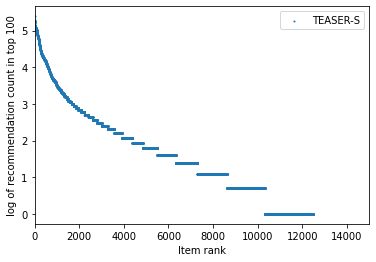

In [13]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)